In [1]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib import colors, cm, pyplot as plt

In [2]:
sequences_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/MSstats - YHE-R.csv', sep=',')

In [3]:
sequences_df.head()

,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity
0,sp|A0A0B4J2D5|GAL3B_HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,2,NaN,NaN,L,YHE,0,YHE010_02_Slot1-1_1_2987,NaN
1,sp|A0A0B4J2D5|GAL3B_HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,2,NaN,NaN,L,YHE,0,YHE010_03_Slot1-1_1_2988,NaN
2,sp|A0A0B4J2D5|GAL3B_HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,2,NaN,NaN,L,YHE,0,YHE010_04_Slot1-1_1_2989,3098.6704
3,sp|A0A0B4J2D5|GAL3B_HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,2,NaN,NaN,L,YHE,0,YHE010_05_Slot1-1_1_2990,NaN
4,sp|A0A0B4J2D5|GAL3B_HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,2,NaN,NaN,L,YHE,0,YHE010_06_Slot1-1_1_2991,1249.3136


In [4]:
sequences_df.columns

Index(['ProteinName', 'PeptideSequence', 'PrecursorCharge', 'FragmentIon',
       'ProductCharge', 'IsotopeLabelType', 'Condition', 'BioReplicate', 'Run',
       'Intensity'],
      dtype='object')

In [5]:
sequences_df = sequences_df[sequences_df.Intensity > 0]

In [6]:
len(sequences_df.drop_duplicates(subset=['PeptideSequence', 'PrecursorCharge'], keep='first', inplace=False))

36261

In [7]:
sequences_df['group'] = sequences_df.Run.apply(lambda x: x.split('_')[0])

In [8]:
sequences_df.group.unique()

array(['YHE010', 'YHE114', 'YHE211'], dtype=object)

#### analyse the YHE runs

In [9]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE114') | (sequences_df.group == 'YHE211')]

In [10]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in yhe_only_df.groupby(['PeptideSequence','PrecursorCharge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df.Run.unique())))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [11]:
number_of_yhe_runs_in_experiment = len(yhe_only_df.Run.unique())
print('there are {} YHE runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 YHE runs in the experiment


In [12]:
# display the number of missing values across the experiment
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values missing across the YHE runs.".format(round(proportion_of_missing_extractions*100)))

37.0% of values missing across the YHE runs.


In [13]:
modified_sequences_count = len(yhe_only_df.PeptideSequence.unique())
modified_sequences_count

29001

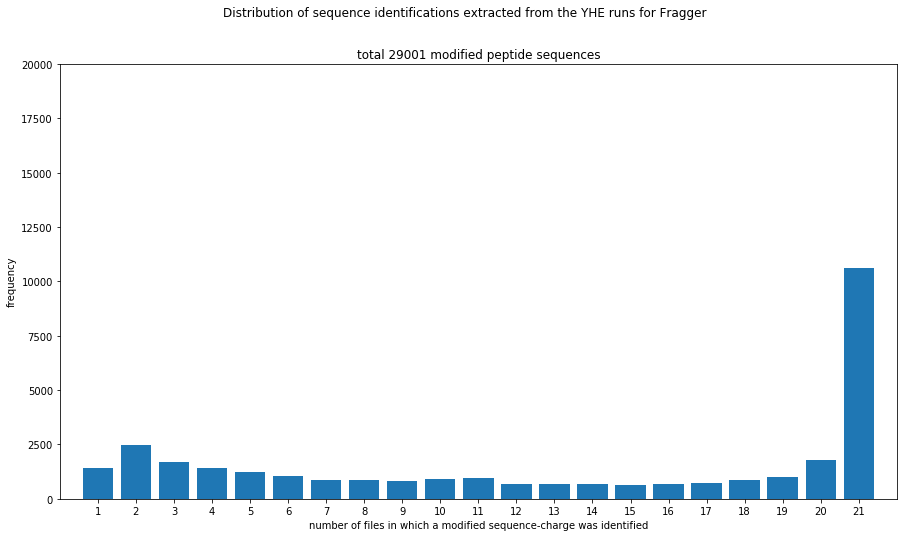

In [16]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YHE runs for Fragger')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
plt.ylim((0,20000))

plt.show()

#### analyse the HeLa-only runs

In [17]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')]

In [18]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in human_only_df.groupby(['PeptideSequence','PrecursorCharge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df.Run.unique())))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [19]:
number_of_human_runs_in_experiment = len(human_only_df.Run.unique())
print('there are {} HeLa-only runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 HeLa-only runs in the experiment


In [20]:
# display the number of missing values across the experiment
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values missing across the HeLa-only runs.".format(round(proportion_of_missing_extractions*100)))

31.0% of values missing across the HeLa-only runs.


In [21]:
modified_sequences_count = len(human_only_df.PeptideSequence.unique())
modified_sequences_count

22462

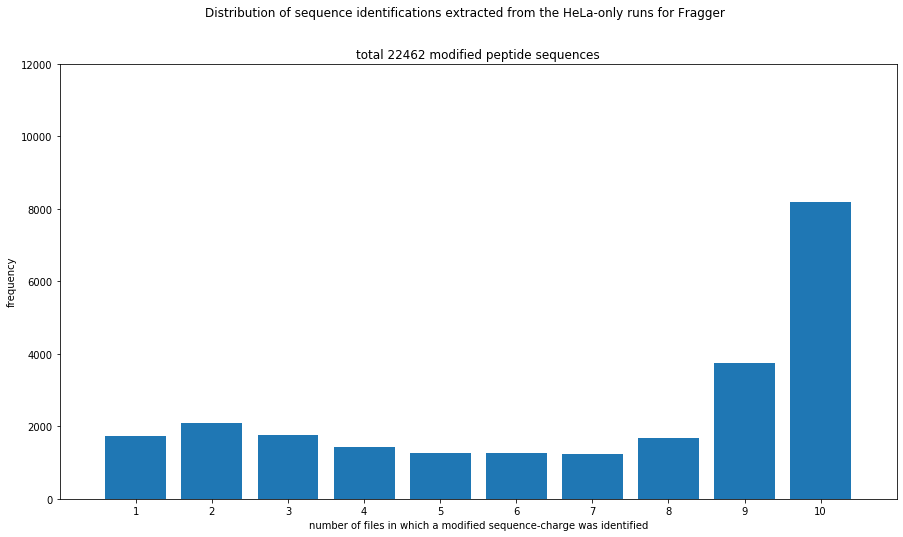

In [22]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the HeLa-only runs for Fragger')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(human_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,12000))

plt.show()